Training data shape:
(50, 2)
Testing data shape:
(10, 2)

normalized training data:
[[101.     1.7 ]
 [120.     2.3 ]
 [115.     4.  ]
 [123.     2.8 ]
 [ 98.     1.2 ]
 [111.     0.3 ]
 [ 85.     0.92]
 [ 76.     3.32]
 [ 78.     4.8 ]
 [ 92.     2.7 ]
 [ 84.     6.11]
 [123.     8.2 ]
 [142.    12.4 ]
 [ 97.     7.4 ]
 [ 75.     5.55]
 [ 89.     6.3 ]
 [159.     9.4 ]
 [100.     2.5 ]
 [102.     6.4 ]
 [111.     5.32]
 [134.     8.4 ]
 [ 76.     2.78]
 [ 88.     3.44]
 [ 89.     3.42]
 [ 68.     2.69]
 [ 65.     0.8 ]
 [132.     8.8 ]
 [144.    12.4 ]
 [116.     6.7 ]
 [108.     3.86]
 [ 62.     4.2 ]
 [ 99.     7.3 ]
 [118.     5.4 ]
 [ 61.     3.33]
 [150.     7.5 ]
 [132.     6.42]
 [122.     9.38]
 [ 75.     4.53]
 [ 71.     3.77]
 [ 86.     6.72]
 [ 77.     4.63]
 [ 93.     4.55]
 [ 91.     3.7 ]
 [ 68.     4.32]
 [108.     8.51]
 [112.    10.4 ]
 [121.     3.54]
 [107.     2.78]
 [143.     1.64]
 [ 61.     0.8 ]]

normalized testing data:
[[ 93.     0.78]
 [104.     3.82]
 [110

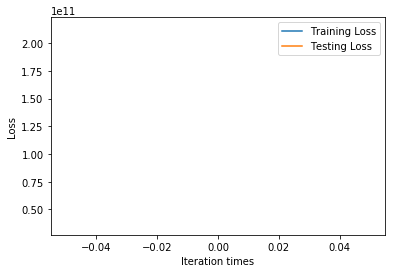

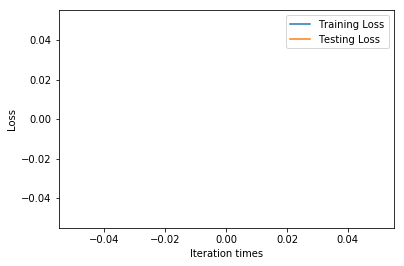

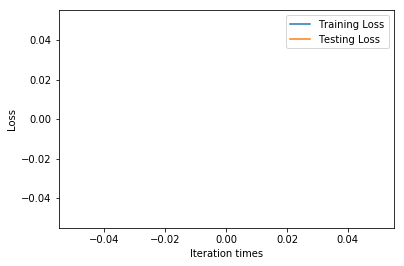

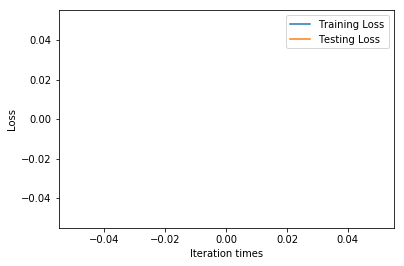

Train Loss:
 [214393980000.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

Test Loss:
 [35973456000.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing   

# Try to find value for W and b to compute y_data = x_data * W + b  

# Define dimensions
d = 2    # Size of the parameter space
N = 50 # Number of data sample

# Model parameters
W = tf.Variable(tf.zeros([d, 1], tf.float32), name="weights")
b = tf.Variable(tf.zeros([1], tf.float32), name="biases")

# Model input and output
x = tf.placeholder(tf.float32, shape=[None, d])
y = tf.placeholder(tf.float32, shape=[None, 1])

# hypothesis
linear_regression_model = tf.add(tf.matmul(x, W), b)
# cost/loss function
loss = tf.reduce_sum(tf.square(linear_regression_model - y))

# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.00015)
train = optimizer.minimize(loss)

training_filename = "dataForTraining.txt"
testing_filename = "dataForTesting.txt"
training_dataset = np.loadtxt(training_filename)
testing_dataset = np.loadtxt(testing_filename)
# x_train_origin = np.array(training_dataset[:,:2])
# y_train_origin = np.array(training_dataset[:,2:3])
# x_test_origin = np.array(testing_dataset[:,:2])
# y_test_origin = np.array(testing_dataset[:,2:3])
dataset = np.vstack((training_dataset,testing_dataset))
# y_max = np.max(dataset[:,2:3])
# y_min = np.min(dataset[:,2:3])
# y_range = y_max - y_min
# y_train_max = np.max(y_train_origin)
# y_train_min = np.min(y_train_origin)
# y_train_range = y_train_max - y_train_min
# y_test_max = np.max(y_test_origin)
# y_test_min = np.min(y_test_origin)
# y_test_range = y_test_max - y_test_min
# print(y_max,y_min,y_range)

min_max_scaler = preprocessing.MinMaxScaler()  
# training_dataset = min_max_scaler.fit_transform(training_dataset) 
# testing_dataset = min_max_scaler.fit_transform(testing_dataset) 
dataset = min_max_scaler.fit_transform(dataset)

x_train = np.array(training_dataset[:,:2])
y_train = np.array(training_dataset[:,2:3])
x_test = np.array(testing_dataset[:,:2])
y_test = np.array(testing_dataset[:,2:3])
print("Training data shape:")
print(x_train.shape)
print("Testing data shape:")
print(x_test.shape)
print('')
print("normalized training data:")
print(x_train)
print('')
print("normalized testing data:")
print(x_test)
print('')

# train_error
# train_error = tf.reduce_mean(tf.square((linear_regression_model - y) / y)) 

save_step_loss = {"step":[],"train_loss":[],"test_loss":[]}# 保存step和loss用于可视化操作
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)  # reset values to wrong
    steps = 1500001
    for i in range(steps):
        sess.run(train, {x: x_train, y: y_train})
        if i % 100000 == 0:
            # evaluate training accuracy
            print("iteration times: %s" % i)
            curr_W, curr_b, curr_train_loss = sess.run([W, b, loss], {x: x_train, y: y_train})
            print("W: %s \nb: %s \nTrain Loss: %s" % (curr_W, curr_b, curr_train_loss))
            # evaluate testing accuracy
            curr_test_loss = sess.run(loss,{x:x_test,y:y_test})
            print("Test Loss: %s\n" % curr_test_loss)
            save_step_loss["step"].append(i)
            save_step_loss["train_loss"].append(curr_train_loss)
            save_step_loss["test_loss"].append(curr_test_loss)
#             print("Train Error: %s" % sess.run(train_error,{x:x_train,y:y_train}))
#             print("Test Error: %s\n" % sess.run(train_error,{x:x_test,y:y_test}))

#画图损失函数变化曲线
plt.plot(save_step_loss["step"],save_step_loss["train_loss"],label='Training Loss')
plt.plot(save_step_loss["step"],save_step_loss["test_loss"],label='Testing Loss')
plt.xlabel('Iteration times')
plt.ylabel('Loss')
plt.legend()
plt.show()
#画图损失函数变化曲线
plt.plot(save_step_loss["step"][1:],save_step_loss["train_loss"][1:],label='Training Loss')
plt.plot(save_step_loss["step"][1:],save_step_loss["test_loss"][1:],label='Testing Loss')
plt.xlabel('Iteration times')
plt.ylabel('Loss')
plt.legend()
plt.show()
#画图损失函数变化曲线
plt.plot(save_step_loss["step"][3:],save_step_loss["train_loss"][3:],label='Training Loss')
plt.plot(save_step_loss["step"][3:],save_step_loss["test_loss"][3:],label='Testing Loss')
plt.xlabel('Iteration times')
plt.ylabel('Loss')
plt.legend()
plt.show()
#画图损失函数变化曲线
plt.plot(save_step_loss["step"][5:],save_step_loss["train_loss"][5:],label='Training Loss')
plt.plot(save_step_loss["step"][5:],save_step_loss["test_loss"][5:],label='Testing Loss')
plt.xlabel('Iteration times')
plt.ylabel('Loss')
plt.legend()
plt.show()

print('Train Loss:\n',save_step_loss["train_loss"])
print('')
print('Test Loss:\n',save_step_loss["test_loss"])